# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd

import brfss

import thinkstats2
import thinkplot

## Scatter plots

I'll start with the data from the BRFSS again.

In [2]:
df = brfss.ReadBrfss(nrows=None)

The following function selects a random subset of a `DataFrame`.

In [3]:
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

I'll extract the height in cm and the weight in kg of the respondents in the sample.

In [4]:
sample = SampleRows(df, 5000)
heights, weights = sample.htm3, sample.wtkg2

Here's a simple scatter plot with `alpha=1`, so each data point is fully saturated.

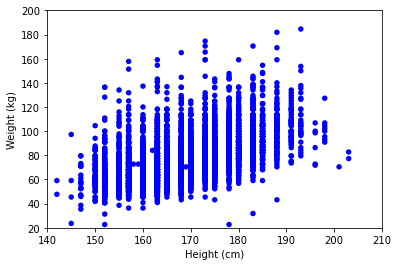

In [5]:
thinkplot.Scatter(heights, weights, alpha=1)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

The data fall in obvious columns because they were rounded off.  We can reduce this visual artifact by adding some random noice to the data.

NOTE: The version of `Jitter` in the book uses noise with a uniform distribution.  Here I am using a normal distribution.  The normal distribution does a better job of blurring artifacts, but the uniform distribution might be more true to the data.

In [6]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

Heights were probably rounded off to the nearest inch, which is 2.8 cm, so I'll add random values from -1.4 to 1.4.

In [7]:
heights = Jitter(heights, 1.4)
weights = Jitter(weights, 0.5)

And here's what the jittered data look like.

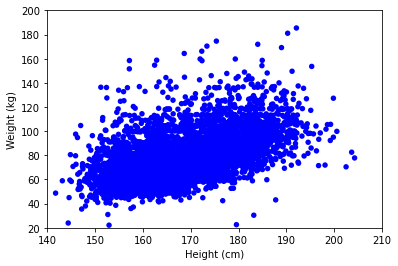

In [8]:
thinkplot.Scatter(heights, weights, alpha=1.0)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

The columns are gone, but now we have a different problem: saturation.  Where there are many overlapping points, the plot is not as dark as it should be, which means that the outliers are darker than they should be, which gives the impression that the data are more scattered than they actually are.

This is a surprisingly common problem, even in papers published in peer-reviewed journals.

We can usually solve the saturation problem by adjusting `alpha` and the size of the markers, `s`.

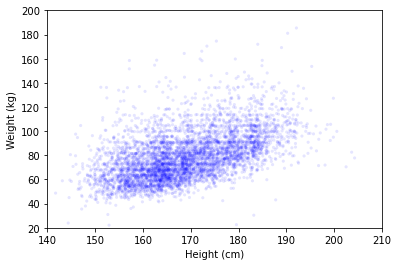

In [9]:
thinkplot.Scatter(heights, weights, alpha=0.1, s=10)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

That's better.  This version of the figure shows the location and shape of the distribution most accurately.  There are still some apparent columns and rows where, most likely, people reported their height and weight using rounded values.  If that effect is important, this figure makes it apparent; if it is not important, we could use more aggressive jittering to minimize it. 

An alternative to a scatter plot is something like a `HexBin` plot, which breaks the plane into bins, counts the number of respondents in each bin, and colors each bin in proportion to its count.

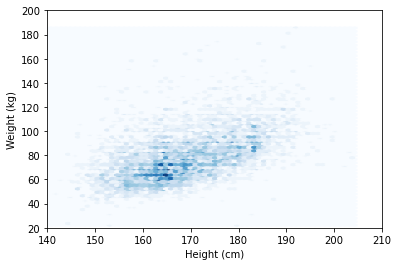

In [10]:
thinkplot.HexBin(heights, weights)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

In this case the binned plot does a pretty good job of showing the location and shape of the distribution.  It obscures the row and column effects, which may or may not be a good thing.

**Exercise:**  So far we have been working with a subset of only 5000 respondents.  When we include the entire dataset, making an effective scatterplot can be tricky.  As an exercise, experiment with `Scatter` and `HexBin` to make a plot that represents the entire dataset well.

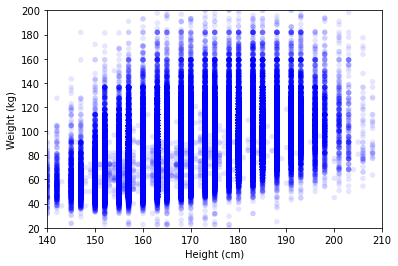

In [11]:
# Solution goes here

# Try scatter plot
heights, weights = df.htm3, df.wtkg2
thinkplot.Scatter(heights, weights, alpha=0.1)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

Now jittering so the data doesn't look like it's in columns, due to the inch values being rounded before being converted to CM:

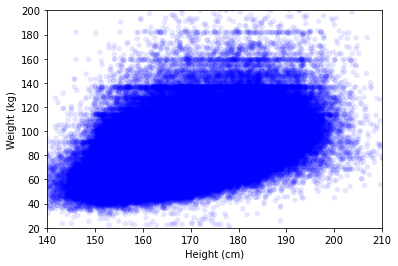

In [12]:
heights = Jitter(heights, 1.4)
weights = Jitter(weights, 0.5)
thinkplot.Scatter(heights, weights, alpha=0.1)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

This is messy. Let's try hex bins:

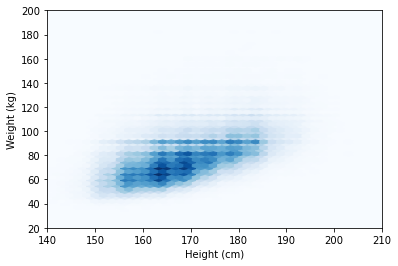

In [13]:
thinkplot.HexBin(heights, weights)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

Hexbin is definitley better to view the most common mappings. However, we can't see the outliers here like we could in the figure above it.

## Plotting percentiles

Sometimes a better way to get a sense of the relationship between variables is to divide the dataset into groups using one variable, and then plot percentiles of the other variable.

First I'll drop any rows that are missing height or weight.

In [14]:
cleaned = df.dropna(subset=['htm3', 'wtkg2'])

Then I'll divide the dataset into groups by height.

In [15]:
bins = np.arange(135, 210, 5)
indices = np.digitize(cleaned.htm3, bins)
groups = cleaned.groupby(indices)
for i, group in groups:
    print(i, group)

0          age  sex    wtyrago      finalwt  wtkg2   htm3
102     81.0    2  45.454545  2454.935430  32.27  132.0
1816    46.0    2  65.909091   362.126421  61.36  130.0
3322    68.0    2  76.363636   189.839968  65.91  122.0
6452    65.0    2  47.727273   195.173030  47.73  122.0
7661    70.0    2  57.272727    99.606163  53.64  122.0
...      ...  ...        ...          ...    ...    ...
412276  44.0    2  58.636364    34.827829  59.09  122.0
413058  43.0    2  52.272727    45.163606  54.55  112.0
413808  35.0    2        NaN    15.225492  84.09  127.0
414023  39.0    2  61.363636    52.241744  65.45  122.0
414279  26.0    2  59.090909    37.450918  64.55  130.0

[305 rows x 6 columns]
1          age  sex    wtyrago     finalwt  wtkg2   htm3
401     82.0    2  58.636364  529.432295  58.64  135.0
1788    74.0    2  96.363636  126.603027  96.36  137.0
5678    40.0    2  54.545455  246.361090  63.64  137.0
5840    54.0    1  93.636364  285.167876  95.45  137.0
7120    54.0    2  50.000

Here are the number of respondents in each group:

In [16]:
for i, group in groups:
    print(i, len(group))

0 305
1 228
2 477
3 2162
4 18759
5 45761
6 70610
7 72138
8 61725
9 49938
10 43555
11 20077
12 7784
13 1777
14 405
15 131


Now we can compute the CDF of weight within each group.

In [17]:
mean_heights = [group.htm3.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.wtkg2) for i, group in groups]

And then extract the 25th, 50th, and 75th percentile from each group.

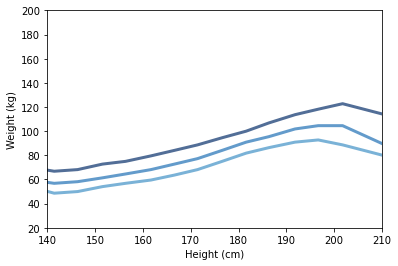

In [18]:
for percent in [75, 50, 25]:
    weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_heights, weight_percentiles, label=label)
    
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200])

**Exercise:** Yet another option is to divide the dataset into groups and then plot the CDF for each group.  As an exercise, divide the dataset into a smaller number of groups and plot the CDF for each group.

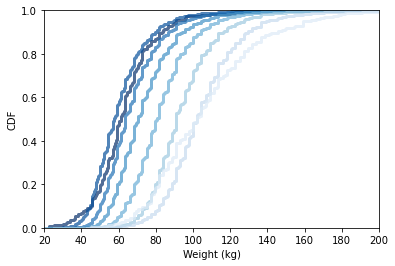

In [19]:
# Solution goes here

bins = np.arange(140, 210, 10)
indices = np.digitize(cleaned.htm3, bins)
groups = cleaned.groupby(indices)
cdfs = [thinkstats2.Cdf(group.wtkg2) for i, group in groups]

thinkplot.PrePlot(len(cdfs))
thinkplot.Cdfs(cdfs)
thinkplot.Config(xlabel='Weight (kg)',
                 ylabel='CDF',
                 axis=[20, 200, 0, 1],
                 legend=False)

## Correlation

The following function computes the covariance of two variables using NumPy's `dot` function.

In [20]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

And here's an example:

In [21]:
heights, weights = cleaned.htm3, cleaned.wtkg2
Cov(heights, weights)

103.33290857697766

Covariance is useful for some calculations, but it doesn't mean much by itself.  The coefficient of correlation is a standardized version of covariance that is easier to interpret.

In [22]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

The correlation of height and weight is about 0.51, which is a moderately strong correlation.

In [23]:
Corr(heights, weights)

0.5087364789734605

NumPy provides a function that computes correlations, too:

In [24]:
np.corrcoef(heights, weights)

array([[1.        , 0.50873648],
       [0.50873648, 1.        ]])

The result is a matrix with self-correlations on the diagonal (which are always 1), and cross-correlations on the off-diagonals (which are always symmetric).

Pearson's correlation is not robust in the presence of outliers, and it tends to underestimate the strength of non-linear relationships.

Spearman's correlation is more robust, and it can handle non-linear relationships as long as they are monotonic.  Here's a function that computes Spearman's correlation:

In [25]:
import pandas as pd

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

For heights and weights, Spearman's correlation is a little higher:

In [26]:
SpearmanCorr(heights, weights)

0.5405846262320477

A Pandas `Series` provides a method that computes correlations, and it offers `spearman` as one of the options.

In [27]:
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

The result is the same as for the one we wrote.

In [28]:
SpearmanCorr(heights, weights)

0.5405846262320491

An alternative to Spearman's correlation is to transform one or both of the variables in a way that makes the relationship closer to linear, and the compute Pearson's correlation.

In [29]:
Corr(cleaned.htm3, np.log(cleaned.wtkg2))

0.5317282605983445

## Exercises

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

In [53]:
import first

live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

live.sample(5, random_state=1)

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
508,481,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,1914.373944,2942.339975,3182.729151,2,53,NaN,7.3125
3256,2910,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,15099.480250,16935.090969,28222.329100,1,74,NaN,6.0625
6946,6297,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3641.774591,5199.313540,7957.549372,1,25,NaN,9.3125
9840,9088,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4504.935155,5445.540089,9074.992558,1,78,NaN,7.6250
1657,1466,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7087.445068,8008.782779,8663.100332,2,56,NaN,8.1875


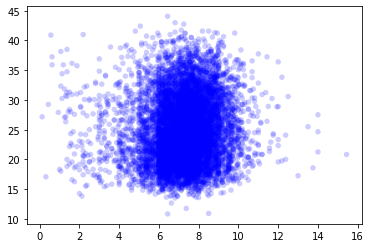

In [54]:
# Solution goes here

weights = live.totalwgt_lb
ages = live.agepreg
ages_floor = ages.apply(np.floor)

weight_cdf = thinkstats2.Cdf(weights)
age_cdf = thinkstats2.Cdf(ages)

thinkplot.Scatter(weights, ages, alpha=0.2)

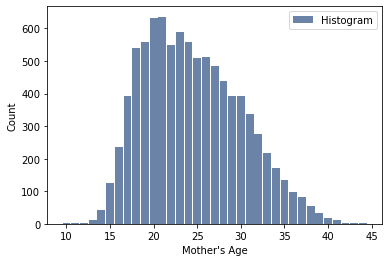

In [55]:
# Solution goes here

# create histogram of ages to help us determine size of bins

hist = thinkstats2.Hist(ages_floor)
thinkplot.Hist(hist, label='Histogram')
thinkplot.Config(xlabel="Mother's Age", ylabel='Count')

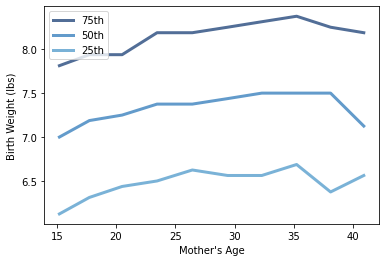

In [90]:
# Solution goes here
def BinnedPercentiles(df):

    # arrange 'bins', from 10 up to, not including 48 w/ increments of 3
    bins = np.arange(10, 48, 3)
    # get a list containing the index of the bin corresponding to each age
    indeces = np.digitize(ages, bins)
    # get groupby objects, grouping by the bin index values
    groups = live.groupby(indeces)

    # Iterate through groupby, which has the index value and dataFrame for each index
    # get a list of the average age within each age group
    binned_ages = [group.agepreg.mean() for i, group in groups][1:-1]

    # get a list of cdfs of birth weights within each age group
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

    # Plot
    for percent in [75, 50, 25]:
        wgts = [cdf.Percentile(percent) for cdf in cdfs]
        label = f"{percent}th" 
        thinkplot.Plot(binned_ages, wgts, label=label)
        thinkplot.Config(xlabel="Mother's Age",
                         ylabel='Birth Weight (lbs)',
                         xrange=[13, 42], legend=True)

BinnedPercentiles(live)

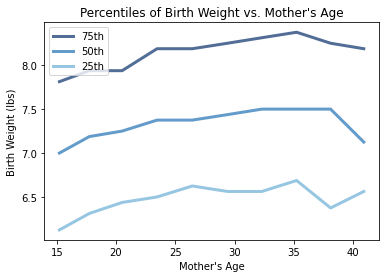

In [91]:
# Plot
thinkplot.PrePlot(3)

for percent in [75, 50, 25]:
    wgts = [cdf.Percentile(percent) for cdf in cdfs]
    label = f"{percent}th" 
    thinkplot.Plot(binned_ages, wgts, label=label)
    thinkplot.Config(xlabel="Mother's Age",
                     ylabel='Birth Weight (lbs)',
                     xrange=[13, 42],
                     legend=True,
                     title="Percentiles of Birth Weight vs. Mother's Age")

In [81]:
# Solution goes here
# Find Correlation manually (for practice)

# Covariance
def Covariance(xs, ys, x_mean=None, y_mean=None):
    xs, ys = np.asarray(xs), np.asarray(ys)
    x_mean, y_mean = np.mean(xs), np.mean(ys)
    
    if x_mean is None:
        x_mean = np.mean(xs)
    if y_mean is None:
        y_mean = np.mean(ys)    
    
    # get the dot product of deviations from mean & divide by length of dataset
    covariance = np.dot(xs - x_mean, ys - y_mean) / len(xs)
    return covariance

def PearsonCorr(xs, ys):
    xs, ys = np.asarray(xs), np.asarray(ys)
    
    # get the mean variance (MeanVariance is more efficient than np.mean and np.var)
    x_mean, x_var = thinkstats2.MeanVar(xs)
    y_mean, y_var = thinkstats2.MeanVar(ys)
    
    p = Covariance(xs, ys, x_mean, y_mean) / np.sqrt(x_var * y_var)
    return p
    
    
# Spearman's Rank Correlation Function
def SpearmansRank(xs, ys):
    x_ranks, y_ranks = pd.Series(xs).rank(), pd.Series(ys).rank()
    
    return x_ranks.corr(y_ranks, method='spearman')


c = Covariance(ages, weights)
p = PearsonCorr(ages, weights)
s = SpearmansRank(ages, weights)

print(f"""Mother's Age vs. Birth Weight Relationship Statistics:\n
CoVariance: \t\t\t{c:.2f}
Pearsons's Correlation: \t{p:.2f} 
Spearman's Rank Correlation: \t{s:.2f}""")



Mother's Age vs. Birth Weight Relationship Statistics:

CoVariance: 			0.54
Pearsons's Correlation: 	0.07 
Spearman's Rank Correlation: 	0.09


The correlation between age and baby weight is weak. We can say this after seeing no visible correlation in the scatterplot, no linear relation on the CDF figure, and finally, a Spearman's Rank Correlation of **0.09**. 